In [1]:
import sys
sys.path.append("..")

import os
from pathlib import Path
from typing import Optional
import numpy as np
import pandas as pd

In [2]:
os.getcwd()

'/home/eva/stapline_tests/resp_charges/R-alanine/R-alanine-confs10-run1_resp_qm_calculations'

In [3]:
from parameteriser import runner

/home/eva/anaconda3/envs/qm_resp_3.8/lib/python3.8/site-packages/psiresp/charge.py:282: FutureWarning: `symmetric_atoms_are_equivalent` will be set to False by default for now, as it is a new feature. It will be set to True by default in the future
  warnings.warn(


Initialise object with a smile string / Use config in config.json if no config file provided, default HF/ file is used. Alternatively  options can be modified in config.py

In [4]:
parm = runner.FF_Genenerator("CNC([C@@](NC(C)=O)(C)CCC/C=C\CCC[C@@](C(NC)=O)(C)NC(C)=O)=O" ,"config.json" )

Treating your residue as a stapled residue


Displaying the molecule. Note that the bakbone atoms are highlighted.

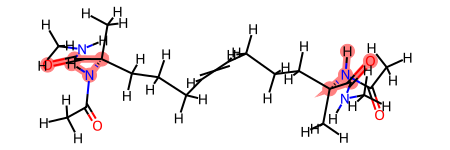

In [5]:
parm.mol

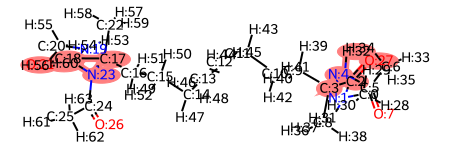

In [6]:
for i, atom in enumerate(parm.mol.GetAtoms()):
    atom.SetProp("molAtomMapNumber", str(atom.GetIdx()))

parm.mol

In [7]:
parm.backbone_list

[32, 2, 3, 4, 17, 18, 21, 23, 27, 60]

In [8]:
parm.sidechain_list

[8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 22,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 57,
 58,
 59]

In [9]:
parm.capping_list

[0,
 1,
 5,
 6,
 7,
 19,
 20,
 24,
 25,
 26,
 28,
 29,
 30,
 31,
 33,
 34,
 35,
 53,
 54,
 55,
 56,
 61,
 62,
 63]

prepare qm inputs for RESP


if you want to run locally then parm.run_qm_resp(), here the qm has been ran externally
once ran go to the cell

In [10]:
parm.get_resp_job_eva()

/home/eva/anaconda3/envs/qm_resp_3.8/lib/python3.8/site-packages/psiresp/charge.py:282: FutureWarning: `symmetric_atoms_are_equivalent` will be set to False by default for now, as it is a new feature. It will be set to True by default in the future
  warnings.warn(


In [11]:
parm.psiresp_job

Job(molecules=[Molecule(name=C20H36N4O4, charge=0) with 10 conformers], qm_optimization_options=QMGeometryOptimizationOptions(method='hf', basis='6-31g*', pcm_options=None, driver='gradient', query_interval=20, protocols={'wavefunction': 'orbitals_and_eigenvalues'}, keywords={}, g_convergence='gau_tight', max_iter=200, full_hess_every=10, jobname='optimization'), qm_esp_options=QMEnergyOptions(method='hf', basis='6-31g*', pcm_options=None, driver='energy', query_interval=20, protocols={'wavefunction': 'orbitals_and_eigenvalues'}, keywords={}, jobname='single_point'), grid_options=GridOptions(grid_rmin=0, grid_rmax=-1, use_radii='msk', vdw_radii={}, vdw_scale_factors=[1.4, 1.6, 1.8, 2.0], vdw_point_density=1.0), resp_options=RespOptions(restraint_slope=0.1, restrained_fit=True, exclude_hydrogens=True, convergence_tolerance=1e-06, max_iter=500, restraint_height_stage_1=0.0005, restraint_height_stage_2=0.001, stage_2=True), charge_constraints=ChargeConstraintOptions(charge_sum_constraints

In [12]:
parm.run_resp_job_eva(parm.psiresp_job)

generate-conformers: 100%|██████████| 1/1 [00:00<00:00, 22919.69it/s]


SystemExit: Exiting to allow running QM computations; commands are in resp_qm_calculations/optimization/run_optimization.sh

/home/eva/anaconda3/envs/qm_resp_3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3513: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [13]:
parm.run_resp_optimisation_eva(parm.psiresp_job)

generating-orientations: 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]


SystemExit: Exiting to allow running QM computations; commands are in resp_qm_calculations/single_point/run_single_point.sh

In [14]:
parm.run_qm_get_charges_eva(parm.psiresp_job)

compute-esp: 100%|██████████| 10/10 [00:00<00:00, 11.14it/s]


In [15]:
parm.charges

array([-0.0453917470134659, -0.5073695728308962,  0.5677978460739399,
        0.1782715506108227, -0.5003016027112773,  0.6046817211204584,
       -0.347125093172232 , -0.5124410317865704, -0.2463242228646885,
       -0.0380280124249042,  0.0081191764204215,  0.0179204423080943,
       -0.2166553142510615, -0.2200122329858956,  0.0560203236439782,
        0.0139556511355134, -0.1341555547634573,  0.0514596037056726,
        0.6071891736231048, -0.5205591114240126, -0.0489529712930006,
       -0.4987245933894662, -0.1192263325664457, -0.4854847298606498,
        0.5948706248596165, -0.2730358392803078, -0.5138162426830049,
       -0.5131434692815955,  0.0698923739410374,  0.0698923739410374,
        0.0698923739410374,  0.2726416157805051,  0.2654021597079419,
        0.1079752813793057,  0.1079752813793057,  0.1079752813793057,
        0.0716671709037405,  0.0716671709037405,  0.0716671709037405,
        0.0228909584417684,  0.0228909584417684,  0.0126494472631176,
        0.0126494472

In [16]:
charges_array = np.array(parm.charges)
charges_array

array([-0.0453917470134659, -0.5073695728308962,  0.5677978460739399,
        0.1782715506108227, -0.5003016027112773,  0.6046817211204584,
       -0.347125093172232 , -0.5124410317865704, -0.2463242228646885,
       -0.0380280124249042,  0.0081191764204215,  0.0179204423080943,
       -0.2166553142510615, -0.2200122329858956,  0.0560203236439782,
        0.0139556511355134, -0.1341555547634573,  0.0514596037056726,
        0.6071891736231048, -0.5205591114240126, -0.0489529712930006,
       -0.4987245933894662, -0.1192263325664457, -0.4854847298606498,
        0.5948706248596165, -0.2730358392803078, -0.5138162426830049,
       -0.5131434692815955,  0.0698923739410374,  0.0698923739410374,
        0.0698923739410374,  0.2726416157805051,  0.2654021597079419,
        0.1079752813793057,  0.1079752813793057,  0.1079752813793057,
        0.0716671709037405,  0.0716671709037405,  0.0716671709037405,
        0.0228909584417684,  0.0228909584417684,  0.0126494472631176,
        0.0126494472

In [17]:
charges_dataframe = pd.DataFrame(charges_array)
charges_dataframe.to_csv('confs10-run1.csv')

And that is step 1 over ! check your folder you should have a .lib file

Let move on to the dihedral parameterisation 

In [ ]:
#Not yet working but that's the plan
parm.prepare_qm_dih()
parm.run_dih_fit()

you can use  parm.run_qm_dih() to run locally or go to the folder and run the qm elsewhare

you now should have a .frcmod file in your folder 
enjoy your MDs !